In [1]:
import os
import pandas as pd
from dotenv import load_dotenv, find_dotenv

In [2]:
load_dotenv(find_dotenv())

fldr = os.environ['processed_fldr']

df = pd.read_csv(os.path.join(fldr, 'preprocessed_data.csv'))
df.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_012
0,1.153688,1.165254,0.196922,1.757936,1.120927,-0.205637,-0.322458,-1.762814,-1.316872,0.482087,...,-0.303173,2.329121,1.998592,1.233999,2.223615,-0.887021,0.316900,-1.065595,-1.474487,0.0
1,-0.866785,-0.858182,-5.078164,-0.511806,1.120927,-0.205637,-0.322458,0.567275,-1.316872,-2.074316,...,3.298445,0.457294,-0.429630,-0.486592,-0.449718,-0.887021,-0.337933,0.963272,-2.440138,0.0
2,1.153688,1.165254,0.196922,-0.057858,-0.892119,-0.205637,-0.322458,-1.762814,0.759375,-2.074316,...,3.298445,2.329121,3.617407,2.954590,2.223615,-0.887021,0.316900,-1.065595,0.939638,0.0
3,1.153688,-0.858182,0.196922,-0.209174,-0.892119,-0.205637,-0.322458,0.567275,0.759375,0.482087,...,-0.303173,-0.478619,-0.429630,-0.486592,-0.449718,-0.887021,0.971733,-2.080028,-0.026012,0.0
4,1.153688,1.165254,0.196922,-0.663122,-0.892119,-0.205637,-0.322458,0.567275,0.759375,0.482087,...,-0.303173,-0.478619,-0.024926,-0.486592,-0.449718,-0.887021,0.971733,-0.051162,-0.991662,0.0


### Splitting dataset

In [3]:
from sklearn.model_selection import train_test_split

X = df.drop('Diabetes_012', axis=1)
y = df['Diabetes_012']

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size=0.3,
                                                    random_state=42)

## Feature Importance

### Logistic Regression

In [4]:
from sklearn.linear_model import LogisticRegression

logReg = LogisticRegression(max_iter=10000)
logReg.fit(X_train, y_train)
logReg_coeff = pd.Series(logReg.coef_[0], index=X.columns).sort_values(ascending=False)
print("Logistic Regression Feature Importance:")
logReg_coeff

Logistic Regression Feature Importance:


Income                  0.080836
PhysHlth                0.075221
HvyAlcoholConsump       0.075015
Education               0.018808
Fruits                  0.013400
DiffWalk                0.012352
MentHlth                0.008368
Smoker                  0.005965
Veggies                 0.003342
AnyHealthcare           0.003258
PhysActivity            0.002192
Stroke                  0.001957
HeartDiseaseorAttack   -0.006063
Sex                    -0.054018
NoDocbcCost            -0.058693
CholCheck              -0.128210
HighBP                 -0.181433
HighChol               -0.205103
BMI                    -0.351251
Age                    -0.371760
GenHlth                -0.411434
dtype: float64

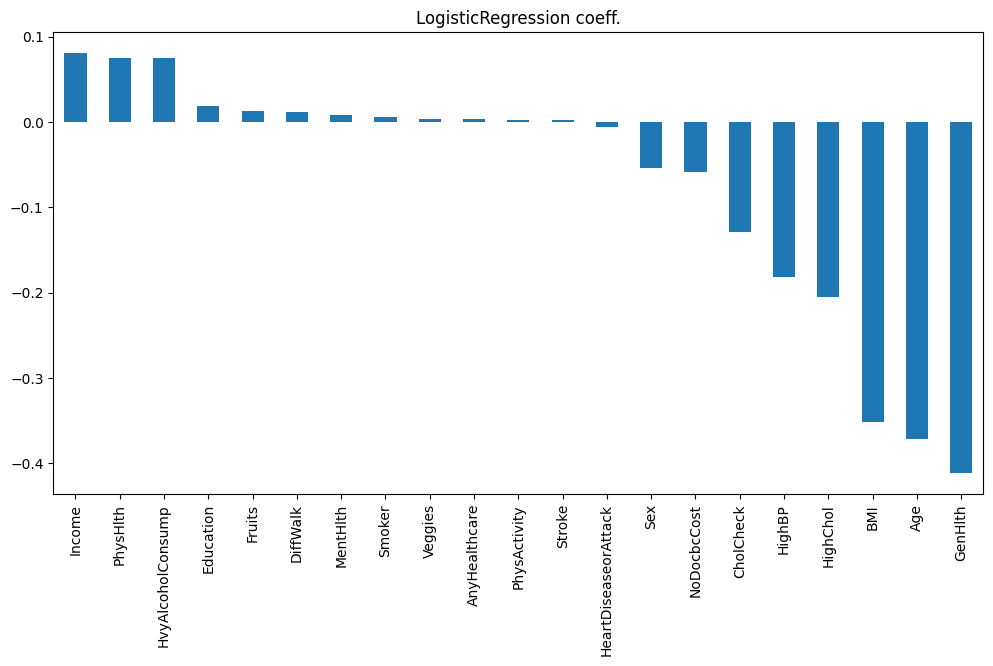

In [5]:
# Plotting
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
logReg_coeff.plot(kind='bar')
plt.title("LogisticRegression coeff.")
plt.show()

According to Logistic Regression, "Income", "PhysHlth" and "HvyAlcoholConsump" are the 3 most important features.

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
classification_report(y_test, y_pred)

In [ ]:
rf_feats = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
rf_feats

BMI                     0.145601
Age                     0.140608
GenHlth                 0.128257
Income                  0.109919
Education               0.074324
PhysHlth                0.069818
MentHlth                0.054966
HighBP                  0.044126
HighChol                0.035557
Smoker                  0.028852
Fruits                  0.028465
Sex                     0.027913
PhysActivity            0.023634
Veggies                 0.021404
DiffWalk                0.017519
HeartDiseaseorAttack    0.013138
NoDocbcCost             0.011084
Stroke                  0.008965
HvyAlcoholConsump       0.006579
AnyHealthcare           0.006167
CholCheck               0.003105
dtype: float64

### SHAP (SHapley Additive exPlanations)

Uses SHAP values to interpret the impact of each feature on the predictions of complex models

In [ ]:
import shap

explainer = shap.TreeExplainer(rf)
shap_vals = explainer.shap_values(X_test)
shap.summary_plot(shap_vals, X_test, feature_names=X.columns)

In [ ]:
shap.summary_plot(shap_vals, X_test, feature_names=X.columns, plot_type="bar")